In [10]:
# Using Python 3.8.3

# DS libraries
import pandas as pd
import numpy as np

# CSV readers
import csv

# Datavis: use matplotlib
import matplotlib.pyplot as plt


Data visualization of batting statistics in the world of Sabermetrics.

In [11]:
# Get the players and their batting stats (regular season only)
batstats = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [3]:
slugppl.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,20247.000000,20079.000000,19939.000000,9984.000000,9983.000000,9982.000000,19542.000000,19622.000000
mean,1935.209167,6.631555,15.617233,1966.961238,6.487629,15.525145,187.959574,72.357915
std,43.013142,3.463773,8.762274,33.297237,3.533907,8.791471,22.431614,2.617187
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1897.000000,4.000000,8.000000,1943.750000,3.000000,8.000000,172.000000,71.000000
50%,1943.000000,7.000000,16.000000,1969.000000,6.000000,15.000000,185.000000,72.000000
75%,1974.000000,10.000000,23.000000,1994.000000,10.000000,23.000000,200.000000,74.000000
max,2001.000000,12.000000,31.000000,2022.000000,12.000000,31.000000,320.000000,83.000000


In [4]:
# batstats.describe()
batstats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
batstats.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108033.000000,106421.000000,85248.000000,108789.000000,106689.000000,72139.000000,105973.000000,102721.000000,72686.000000,83348.000000
mean,1967.221631,1.078914,50.740488,139.241320,18.483496,36.388605,6.202024,1.247075,2.850150,16.790388,2.918775,1.177353,12.842907,20.559814,1.055227,1.057958,2.197087,1.022893,2.893495
std,39.747437,0.286916,46.889589,183.602089,28.043230,52.188884,9.627314,2.595462,6.368678,26.225046,7.608039,2.682099,20.595082,28.514873,2.709589,2.291269,4.154759,1.930262,4.672691
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1937.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,46.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,1.000000,79.000000,224.000000,27.000000,56.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2020.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


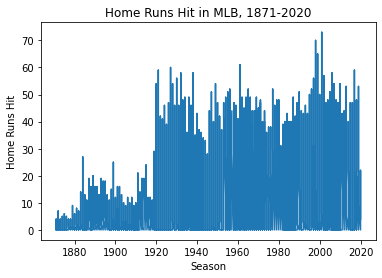

In [7]:
plt.plot(batstats.yearID, batstats.HR)
plt.xlabel("Season")
plt.ylabel("Home Runs Hit")
plt.title("Home Runs Hit in MLB, 1871-2020")
plt.show()

In [8]:
batstats.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [14]:
batstats_arr = batstats.to_numpy()
batstats_arr

array([['abercda01', 1871, 1, ..., nan, nan, 0.0],
       ['addybo01', 1871, 1, ..., nan, nan, 0.0],
       ['allisar01', 1871, 1, ..., nan, nan, 1.0],
       ...,
       ['zimmeky01', 2020, 1, ..., 0.0, 0.0, 0.0],
       ['zuberty01', 2020, 1, ..., 0.0, 0.0, 0.0],
       ['zuninmi01', 2020, 1, ..., 0.0, 0.0, 0.0]], dtype=object)

In [15]:
pencehu_stats = pd.DataFrame(columns=['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'])
counter = 0

for a in batstats_arr:
    if a[0] == 'pencehu01':
        pencehu_stats.loc[counter] = a
        counter += 1


In [16]:
# Hunter Pence statistics, 2007-2020 (14 seasons)
pencehu_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,pencehu01,2007,1,HOU,NL,108,456,57,147,30,...,69.0,11.0,5.0,26,95.0,0.0,1.0,0.0,1.0,10.0
1,pencehu01,2008,1,HOU,NL,157,595,78,160,34,...,83.0,11.0,10.0,40,124.0,2.0,4.0,0.0,3.0,14.0
2,pencehu01,2009,1,HOU,NL,159,585,76,165,26,...,72.0,14.0,11.0,58,109.0,1.0,1.0,0.0,3.0,25.0
3,pencehu01,2010,1,HOU,NL,156,614,93,173,29,...,91.0,18.0,9.0,41,105.0,2.0,0.0,0.0,3.0,11.0
4,pencehu01,2011,1,HOU,NL,100,399,49,123,26,...,62.0,7.0,1.0,30,86.0,1.0,1.0,0.0,2.0,7.0
5,pencehu01,2011,2,PHI,NL,54,207,35,67,12,...,35.0,1.0,1.0,26,38.0,2.0,0.0,0.0,3.0,8.0
6,pencehu01,2012,1,PHI,NL,101,398,59,108,15,...,59.0,4.0,2.0,37,85.0,1.0,3.0,0.0,2.0,13.0
7,pencehu01,2012,2,SFN,NL,59,219,28,48,11,...,45.0,1.0,0.0,19,60.0,1.0,4.0,1.0,5.0,1.0
8,pencehu01,2013,1,SFN,NL,162,629,91,178,35,...,99.0,22.0,3.0,52,115.0,3.0,3.0,0.0,3.0,17.0
9,pencehu01,2014,1,SFN,NL,162,650,106,180,29,...,74.0,13.0,6.0,52,130.0,3.0,3.0,0.0,3.0,13.0


In [17]:
pencehu_stats.describe()

,RBI,SB,CS,SO,IBB,HBP,SH,SF,GIDP
count,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000
mean,58.875000,7.50000,3.437500,83.437500,1.187500,1.625000,0.0625,2.437500,9.437500
std,24.410039,6.65332,3.669128,32.565767,0.981071,1.408309,0.2500,1.314978,6.324226
min,6.000000,0.00000,0.000000,15.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,43.750000,1.75000,1.000000,59.750000,0.750000,0.750000,0.0000,2.000000,6.000000
50%,60.500000,5.50000,1.500000,90.500000,1.000000,1.000000,0.0000,3.000000,9.000000
75%,72.500000,11.50000,5.250000,106.000000,2.000000,3.000000,0.0000,3.000000,13.000000
max,99.000000,22.00000,11.000000,130.000000,3.000000,4.000000,1.0000,5.000000,25.000000


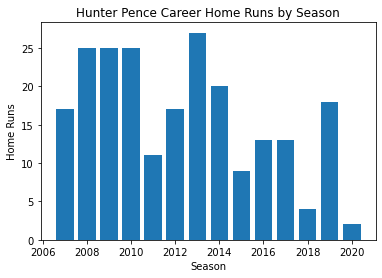

In [20]:
plt.bar(pencehu_stats.yearID, pencehu_stats.HR)
plt.xlabel("Season")
plt.ylabel("Home Runs")
plt.title("Hunter Pence Career Home Runs by Season")
plt.show()

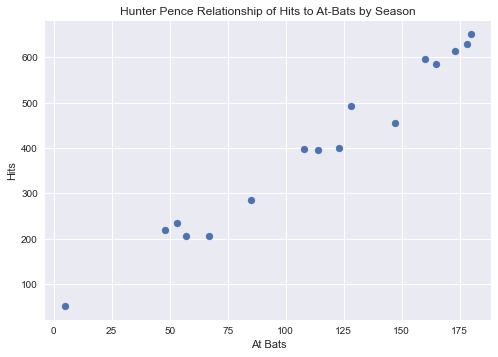

In [26]:
plt.scatter(pencehu_stats.H, pencehu_stats.AB)
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("Hunter Pence Relationship of Hits to At-Bats by Season")
plt.show()